In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import date
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Combination

In [2]:
#col_names = ['Date Time', 'Total Flow', 'MBIKE', 'CAR','LGV','BUS','HGV_RIG','HGV_ART','CARAVAN','Invalid Reading','%HGV']
station0 = pd.read_csv('/content/drive/MyDrive/Traffic Flow Analysis/Đồ án DS304/Dataset/station0.csv')
station1 = pd.read_csv('/content/drive/MyDrive/Traffic Flow Analysis/Đồ án DS304/Dataset/station1.csv')
station2 = pd.read_csv('/content/drive/MyDrive/Traffic Flow Analysis/Đồ án DS304/Dataset/station2.csv')
station3 = pd.read_csv('/content/drive/MyDrive/Traffic Flow Analysis/Đồ án DS304/Dataset/station3.csv')
station4 = pd.read_csv('/content/drive/MyDrive/Traffic Flow Analysis/Đồ án DS304/Dataset/station4.csv')
station5 = pd.read_csv('/content/drive/MyDrive/Traffic Flow Analysis/Đồ án DS304/Dataset/station5.csv')
station6 = pd.read_csv('/content/drive/MyDrive/Traffic Flow Analysis/Đồ án DS304/Dataset/station6.csv')
station7 = pd.read_csv('/content/drive/MyDrive/Traffic Flow Analysis/Đồ án DS304/Dataset/station7.csv')
station8 = pd.read_csv('/content/drive/MyDrive/Traffic Flow Analysis/Đồ án DS304/Dataset/station8.csv')
#, names=col_names
#traffic_data = traffic_data.drop(index)
#traffic_data = traffic_data.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')
#traffic_data = traffic_data.drop(['%HGV'], axis = 1)
station0.head(5)

,Invalid,MBIKE,CAR,LGV,BUS,HGV_RIG,HGV_ART,CARAVAN,Total,HGVs
0,1.0,0.0,225.0,5.0,21.0,10.0,23.0,1.00000,286.00000,33.0
1,0.0,0.0,108.0,2.0,8.0,6.0,16.0,0.84322,140.84322,22.0
2,2.0,2.0,90.0,5.0,8.0,4.0,12.0,0.33451,123.33451,16.0
3,6.0,4.0,255.0,12.0,12.0,11.0,15.0,0.33451,315.33451,26.0
4,14.0,13.0,982.0,47.0,22.0,20.0,29.0,0.33451,1127.33451,49.0


In [3]:
traffic_data = pd.DataFrame()
traffic_data['station0'] = station0[['Total']]
traffic_data['station1'] = station1[['Total']]
traffic_data['station2'] = station2[['Total']]
traffic_data['station3'] = station3[['Total']]
traffic_data['station4'] = station4[['Total']]
traffic_data['station5'] = station5[['Total']]
traffic_data['station6'] = station6[['Total']]
traffic_data['station7'] = station7[['Total']]
traffic_data['station8'] = station8[['Total']]
traffic_data.head(5)

,station0,station1,station2,station3,station4,station5,station6,station7,station8
0,286.00000,917.0,728.000000,604.000000,108.000000,204.000000,532.000000,713.000000,815.000000
1,140.84322,506.0,408.773251,380.782758,64.055779,106.803239,370.000000,384.956179,467.105533
2,123.33451,385.0,322.000000,280.815809,40.471014,85.677942,255.682071,301.000000,361.000000
3,315.33451,529.0,371.830464,328.000000,68.902591,102.924045,286.000000,372.000000,421.872219
4,1127.33451,1281.0,581.000000,726.000000,241.828590,138.533604,626.889384,905.000000,949.000000


In [4]:
weather_data = pd.read_csv('/content/drive/MyDrive/Traffic Flow Analysis/Đồ án DS304/Dataset/WeatherDataset.csv')
weather_data['Date'], weather_data['Time'] = weather_data['date'].str.split(' ', 1).str
weather_data = weather_data[['Date','Time','rain','temp', 'wetb', 'dewpt', 'rhum', 'vappr', 'msl', 'wdsp', 'wddir', 'sun', 'vis', 'clht', 'clamt']]
#weather_data['DATE'] = pd.to_datetime(weather_data['DATE'])
weather_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


,Date,Time,rain,temp,wetb,dewpt,rhum,vappr,msl,wdsp,wddir,sun,vis,clht,clamt
0,01/03/2013,0:00,0.0,4.5,4.3,4.0,8.1,97,1033.6,6,30,0.0,9000,250,5
1,01/03/2013,1:00,0.0,4.9,4.8,4.6,8.5,98,1033.3,7,30,0.0,7000,37,7
2,01/03/2013,2:00,0.0,5.1,4.9,4.7,8.5,97,1033.2,5,10,0.0,9000,37,7
3,01/03/2013,3:00,0.0,5.0,4.8,4.5,8.4,97,1033.0,4,20,0.0,9000,33,7
4,01/03/2013,4:00,0.0,5.1,4.8,4.5,8.4,95,1032.8,5,10,0.0,12000,34,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78883,28/02/2022,19:00,0.0,2.5,1.7,0.3,6.3,86,1024.6,6,290,0.0,30000,999,2
78884,28/02/2022,20:00,0.0,2.2,1.4,0.0,6.1,86,1025.7,7,300,0.0,30000,999,1
78885,28/02/2022,21:00,0.0,1.1,0.6,-0.3,6.0,90,1026.5,5,290,0.0,30000,999,1
78886,28/02/2022,22:00,0.0,0.0,-0.3,-1.0,5.7,94,1027.3,6,290,0.0,30000,999,1


In [5]:
panel_data = pd.concat([traffic_data, weather_data], axis=1)
panel_data['Datetime'] = panel_data['Date'] + ' ' + panel_data['Time']
#panel_data['Datetime'] = pd.to_datetime(panel_data['Datetime']).dt.strftime('%Y-%m-%d %H:%M:%S')
panel_data.drop(['Date','Time'],axis=1, inplace = True)
column_to_move = panel_data.pop("Datetime")
panel_data.insert(0, "Datetime", column_to_move)
data = panel_data.set_index('Datetime')
for i in range(len(panel_data)):
  panel_data['Datetime'][i] = datetime.strptime(panel_data['Datetime'][i], '%d/%m/%Y %H:%M')
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,station0,station1,station2,station3,station4,station5,station6,station7,station8,rain,...,dewpt,rhum,vappr,msl,wdsp,wddir,sun,vis,clht,clamt
Datetime,,,,,,,,,,,,,,,,,,,,,
01/03/2013 0:00,286.00000,917.000000,728.000000,604.000000,108.000000,204.000000,532.000000,713.000000,815.000000,0.0,...,4.0,8.1,97,1033.6,6,30,0.0,9000,250,5
01/03/2013 1:00,140.84322,506.000000,408.773251,380.782758,64.055779,106.803239,370.000000,384.956179,467.105533,0.0,...,4.6,8.5,98,1033.3,7,30,0.0,7000,37,7
01/03/2013 2:00,123.33451,385.000000,322.000000,280.815809,40.471014,85.677942,255.682071,301.000000,361.000000,0.0,...,4.7,8.5,97,1033.2,5,10,0.0,9000,37,7
01/03/2013 3:00,315.33451,529.000000,371.830464,328.000000,68.902591,102.924045,286.000000,372.000000,421.872219,0.0,...,4.5,8.4,97,1033.0,4,20,0.0,9000,33,7
01/03/2013 4:00,1127.33451,1281.000000,581.000000,726.000000,241.828590,138.533604,626.889384,905.000000,949.000000,0.0,...,4.5,8.4,95,1032.8,5,10,0.0,12000,34,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28/02/2022 19:00,2117.00000,5664.000000,4425.000000,3817.000000,722.785158,1593.368291,2184.078868,6124.000000,6538.000000,0.0,...,0.3,6.3,86,1024.6,6,290,0.0,30000,999,2
28/02/2022 20:00,1699.35193,3994.000000,2927.000000,2734.000000,578.246606,1188.000000,1682.000000,4197.000000,4393.000000,0.0,...,0.0,6.1,86,1025.7,7,300,0.0,30000,999,1
28/02/2022 21:00,1197.00000,2827.000000,2108.000000,1844.000000,389.785158,710.000000,1233.000000,2893.000000,3122.000000,0.0,...,-0.3,6.0,90,1026.5,5,290,0.0,30000,999,1


In [6]:
data.to_csv('/content/drive/MyDrive/Traffic Flow Analysis/Đồ án DS304/Dataset/Dataset.csv')

In [7]:
panel_data['Datetime'] = pd.to_datetime(panel_data['Datetime'])
panel_data['Weekday'] = panel_data['Datetime'].dt.dayofweek
panel_data['Month'] = panel_data['Datetime'].dt.month
panel_data['Year'] = panel_data['Datetime'].dt.year
panel_data['Time'] = panel_data['Datetime'].dt.time
panel_data['Month/Year'] = panel_data['Datetime'].dt.strftime('%m/%Y')
column_to_move = panel_data.pop("Weekday")
panel_data.insert(1, "Weekday", column_to_move)
column_to_move = panel_data.pop("Month")
panel_data.insert(2, "Month", column_to_move)
column_to_move = panel_data.pop("Year")
panel_data.insert(3, "Year", column_to_move)
column_to_move = panel_data.pop("Month/Year")
panel_data.insert(4, "Month/Year", column_to_move)
column_to_move = panel_data.pop("Time")
panel_data.insert(5, "Time", column_to_move)
panel_data

,Datetime,Weekday,Month,Year,Month/Year,Time,station0,station1,station2,station3,...,dewpt,rhum,vappr,msl,wdsp,wddir,sun,vis,clht,clamt
0,2013-03-01 00:00:00,4,3,2013,03/2013,00:00:00,286.00000,917.000000,728.000000,604.000000,...,4.0,8.1,97,1033.6,6,30,0.0,9000,250,5
1,2013-03-01 01:00:00,4,3,2013,03/2013,01:00:00,140.84322,506.000000,408.773251,380.782758,...,4.6,8.5,98,1033.3,7,30,0.0,7000,37,7
2,2013-03-01 02:00:00,4,3,2013,03/2013,02:00:00,123.33451,385.000000,322.000000,280.815809,...,4.7,8.5,97,1033.2,5,10,0.0,9000,37,7
3,2013-03-01 03:00:00,4,3,2013,03/2013,03:00:00,315.33451,529.000000,371.830464,328.000000,...,4.5,8.4,97,1033.0,4,20,0.0,9000,33,7
4,2013-03-01 04:00:00,4,3,2013,03/2013,04:00:00,1127.33451,1281.000000,581.000000,726.000000,...,4.5,8.4,95,1032.8,5,10,0.0,12000,34,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78883,2022-02-28 19:00:00,0,2,2022,02/2022,19:00:00,2117.00000,5664.000000,4425.000000,3817.000000,...,0.3,6.3,86,1024.6,6,290,0.0,30000,999,2
78884,2022-02-28 20:00:00,0,2,2022,02/2022,20:00:00,1699.35193,3994.000000,2927.000000,2734.000000,...,0.0,6.1,86,1025.7,7,300,0.0,30000,999,1
78885,2022-02-28 21:00:00,0,2,2022,02/2022,21:00:00,1197.00000,2827.000000,2108.000000,1844.000000,...,-0.3,6.0,90,1026.5,5,290,0.0,30000,999,1
78886,2022-02-28 22:00:00,0,2,2022,02/2022,22:00:00,1194.35193,2409.000000,1650.000000,1565.000000,...,-1.0,5.7,94,1027.3,6,290,0.0,30000,999,1


## EDA

### Traffic Flow Analysis

In [ ]:
traffic_data.describe()

,station0,station1,station2,station3,station4,station5,station6,station7,station8
count,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000
mean,2102.521906,4760.496322,3736.763854,3165.329079,643.727205,1334.827102,1699.061766,5191.919555,5568.467767
std,1109.777429,2992.890370,2576.629905,1941.830381,395.084137,1006.825305,883.748298,3510.576045,3771.717641
min,28.212860,44.964890,32.976444,32.123133,13.393746,19.242416,27.455329,42.869338,46.930061
25%,1226.000000,2040.000000,1172.000000,1281.325696,313.390313,305.576503,902.094479,1737.000000,1802.923704
50%,2187.154572,4624.000000,3734.000000,3313.000000,599.917432,1246.000000,1888.944692,5169.500000,5602.500000
75%,3045.000000,7403.000000,5819.000000,4917.000000,978.421242,2267.000000,2495.000000,8314.250000,8946.000000
max,4422.000000,11342.000000,9709.604695,7188.000000,1800.000000,3666.000000,3300.000000,21130.349469,13770.767203


In [ ]:
weather_data.describe()

,rain,temp,wetb,dewpt,rhum,vappr,msl,wdsp,wddir,sun,vis,clht,clamt
count,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000
mean,0.087491,9.867588,8.373873,6.718747,10.242570,81.856189,1013.388955,10.201374,206.637004,0.169668,28228.802860,292.448066,5.614479
std,0.420256,5.023759,4.435341,4.491409,3.121622,11.904732,12.552492,5.213165,81.481553,0.324346,13853.943542,403.398338,2.270411
min,0.000000,-7.700000,-49.900000,-8.900000,3.100000,24.000000,954.300000,0.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,0.000000,6.200000,5.100000,3.300000,7.800000,75.000000,1005.700000,6.000000,140.000000,0.000000,20000.000000,25.000000,4.000000
50%,0.000000,9.800000,8.500000,6.800000,9.900000,84.000000,1014.700000,9.000000,230.000000,0.000000,30000.000000,50.000000,7.000000
75%,0.000000,13.500000,11.700000,10.000000,12.300000,91.000000,1022.000000,13.000000,270.000000,0.100000,40000.000000,250.000000,7.000000
max,16.500000,26.300000,20.800000,19.100000,22.100000,100.000000,1048.200000,44.000000,360.000000,1.000000,75000.000000,999.000000,9.000000


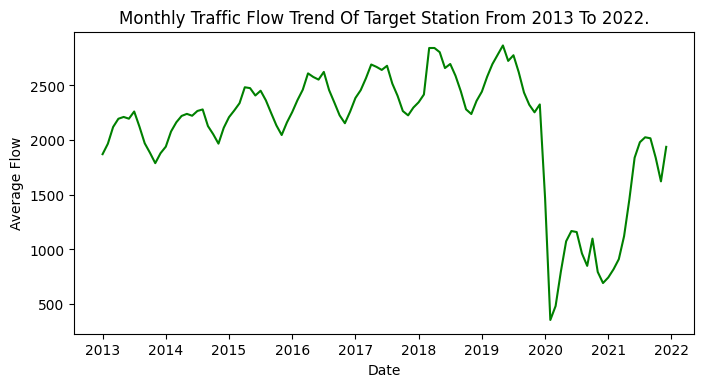

In [8]:
monthly_avg_flow = panel_data[['Month/Year','Year','Month', 'station0','station1','station2','station3','station4','station5','station6','station7','station8']].groupby(by = ['Month/Year']).mean().reset_index()
#monthly_avg_flow = monthly_avg_flow.set_index('Month/Year')
monthly_avg_flow = monthly_avg_flow.sort_values(by = ['Year','Month'])
monthly_avg_flow =  monthly_avg_flow.reset_index(drop =True)

def plot_df(df, x, y,title="", xlabel='Date', ylabel='Average Flow', dpi=100):
  plt.figure(figsize=(8,4), dpi=dpi)
  plt.plot(x, y, color='#008000')
  plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
  plt.xticks([0, 12, 24, 36, 48, 60, 72 , 84 ,96, 108],['2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'])
  plt.show()

plot_df(monthly_avg_flow, x=monthly_avg_flow['Month/Year'], y = monthly_avg_flow['station0'], title='Monthly Traffic Flow Trend Of Target Station From 2013 To 2022.')

In [9]:
hourly_avg_flow = panel_data[['Time','station0','station1','station2','station3','station4','station5','station6','station7','station8']].groupby(by = ['Time']).mean().reset_index()
#hourly_avg_flow = hourly_avg_flow.sort_values(by = ['Year','Month'])
#hourly_avg_flow =  hourly_avg_flow.set_index('Time')
hourly_avg_flow

,Time,station0,station1,station2,station3,station4,station5,station6,station7,station8
0,00:00:00,976.464578,1463.808275,887.839487,973.086893,254.845159,236.250197,680.278313,1283.660963,1334.052888
1,01:00:00,432.000591,782.044870,535.933771,537.662116,124.631874,153.899527,394.506350,695.297884,751.906209
2,02:00:00,270.941022,511.721506,387.127327,365.472312,77.623092,108.679740,277.935035,448.722104,497.633662
3,03:00:00,603.797515,741.392445,470.958078,467.821312,136.888368,126.332640,357.741049,609.259308,638.930882
4,04:00:00,1562.983576,1573.023260,698.149701,912.680220,329.603357,175.411840,698.580388,1222.938036,1238.310023
5,05:00:00,2244.654963,2575.752281,1278.910627,1556.722630,470.449884,322.691411,1009.313034,2069.740759,2089.236167
6,06:00:00,2105.874247,4543.494375,3437.053755,3133.607650,585.026509,710.474090,1745.162401,4410.830903,4705.896995
7,07:00:00,2440.312597,6674.962942,5497.455360,4433.764011,754.714433,1553.887028,2107.639015,7500.720640,7974.019447
8,08:00:00,2898.995775,7058.695324,5837.944421,4333.078841,859.647128,2025.252280,2002.198109,7739.209834,8094.938495
9,09:00:00,2802.290039,6448.843904,4990.024064,4225.426516,832.152541,1821.657348,2120.795422,7156.456823,7636.009092


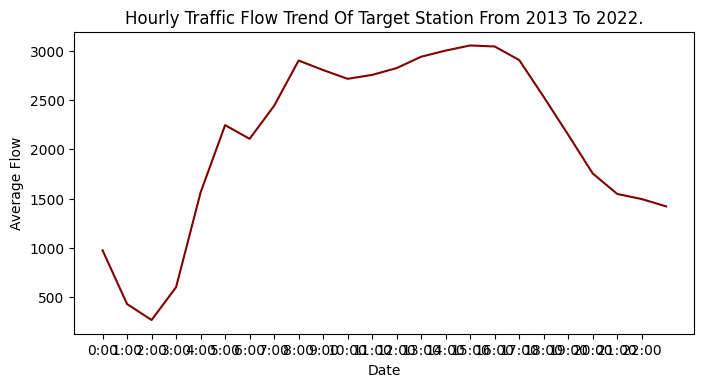

In [10]:
def plot_df(df, x, y,title="", xlabel='Date', ylabel='Average Flow', dpi=100):
  plt.figure(figsize=(8,4), dpi=dpi)
  plt.plot(x, y , color = '#800000')
  plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
  plt.xticks(range(0,23),['0:00','1:00','2:00','3:00','4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00'])
  plt.show()

plot_df(hourly_avg_flow, x=hourly_avg_flow.index, y = hourly_avg_flow['station0'], title='Hourly Traffic Flow Trend Of Target Station From 2013 To 2022.')

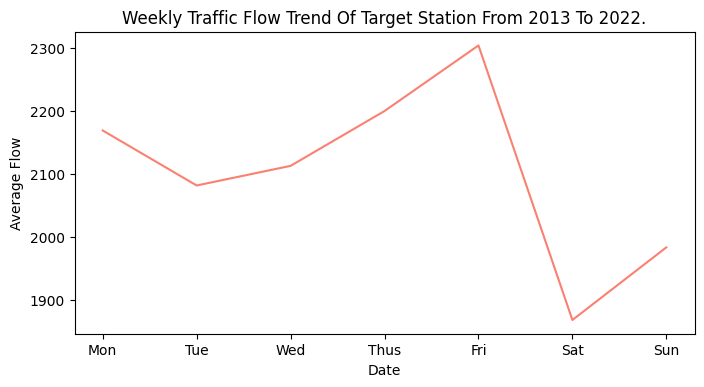

In [11]:
from matplotlib import colors
weekly_avg_flow = panel_data[['Weekday','station0','station1','station2','station3','station4','station5','station6','station7','station8']].groupby(by = ['Weekday']).mean().reset_index()
weekly_avg_flow

def plot_df(df, x, y,title="", xlabel='Date', ylabel='Average Flow', dpi=100):
  plt.figure(figsize=(8,4), dpi=dpi)
  plt.plot(x, y, color= '#FA8072')
  plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
  plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thus','Fri','Sat','Sun'])
  plt.show()

plot_df(weekly_avg_flow, x=weekly_avg_flow['Weekday'], y = weekly_avg_flow['station0'], title='Weekly Traffic Flow Trend Of Target Station From 2013 To 2022.')

In [12]:
weekly_avg_flow = panel_data[['Datetime','Weekday','Month','Year','station0']]
weekly_avg_flow['Day'] = weekly_avg_flow['Datetime'].dt.date
weekly_avg_flow = weekly_avg_flow.groupby(by=['Day']).mean().reset_index()
weekly_avg_flow

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Day,Weekday,Month,Year,station0
0,2013-03-01,4.0,3.0,2013.0,2040.217484
1,2013-03-02,5.0,3.0,2013.0,1564.523962
2,2013-03-03,6.0,3.0,2013.0,1712.688775
3,2013-03-04,0.0,3.0,2013.0,1863.283320
4,2013-03-05,1.0,3.0,2013.0,1747.374764
...,...,...,...,...,...
3282,2022-02-24,3.0,2.0,2022.0,2034.972532
3283,2022-02-25,4.0,2.0,2022.0,2328.294721
3284,2022-02-26,5.0,2.0,2022.0,1963.692851
3285,2022-02-27,6.0,2.0,2022.0,2133.855470


In [13]:
w0 = weekly_avg_flow.query("Weekday == 0").reset_index(drop=True)
w1 = weekly_avg_flow.query("Weekday == 1").reset_index(drop=True)
w2 = weekly_avg_flow.query("Weekday == 2").reset_index(drop=True)
w3 = weekly_avg_flow.query("Weekday == 3").reset_index(drop=True)
w4 = weekly_avg_flow.query("Weekday == 4").reset_index(drop=True)
w5 = weekly_avg_flow.query("Weekday == 5").reset_index(drop=True)
w6 = weekly_avg_flow.query("Weekday == 6").reset_index(drop=True)

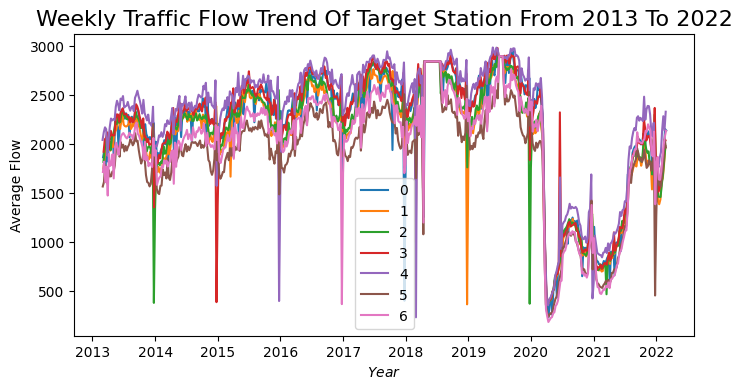

In [14]:
plt.figure(figsize=(8,4), dpi=100)
plt.gca().set(ylabel='Average Flow', xlabel='$Year$')
plt.title("Weekly Traffic Flow Trend Of Target Station From 2013 To 2022", fontsize=16)
#plt.xticks([0, 12, 24, 36, 48, 60, 72 , 84 ,96, 108],['2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'])
plt.plot(w0['Day'], w0['station0'], label='0')
plt.plot(w1['Day'], w1['station0'], label='1')
plt.plot(w2['Day'], w2['station0'], label='2')
plt.plot(w3['Day'], w3['station0'], label='3')
plt.plot(w4['Day'], w4['station0'], label='4')
plt.plot(w5['Day'], w5['station0'], label='5')
plt.plot(w6['Day'], w6['station0'], label='6')
plt.legend()
plt.show()

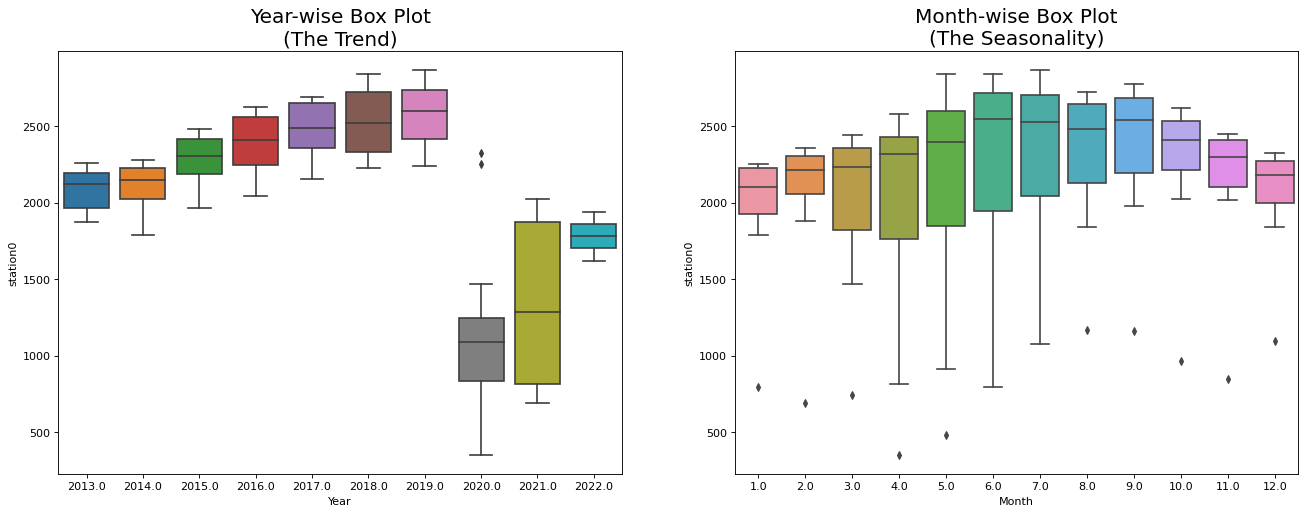

In [ ]:
years = monthly_avg_flow['Year'].unique()

fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='station0', data=monthly_avg_flow, ax=axes[0])
sns.boxplot(x='Month', y='station0', data=monthly_avg_flow.loc[~monthly_avg_flow.Year.isin([2013, 2022]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

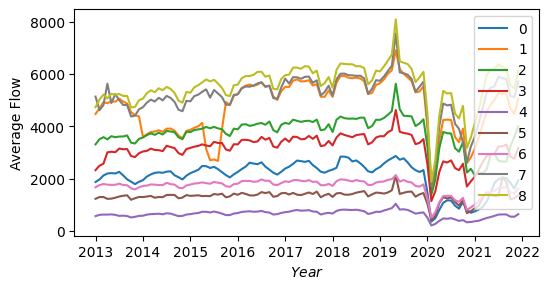

In [22]:
plt.figure(figsize=(6,3), dpi=100)
plt.gca().set(ylabel='Average Flow', xlabel='$Year$')
plt.xticks([0, 12, 24, 36, 48, 60, 72 , 84 ,96, 108],['2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'])
plt.plot(monthly_avg_flow['Month/Year'], monthly_avg_flow['station0'], label='0')
plt.plot(monthly_avg_flow['Month/Year'], monthly_avg_flow['station1'], label='1')
plt.plot(monthly_avg_flow['Month/Year'], monthly_avg_flow['station2'], label='2')
plt.plot(monthly_avg_flow['Month/Year'], monthly_avg_flow['station3'], label='3')
plt.plot(monthly_avg_flow['Month/Year'], monthly_avg_flow['station4'], label='4')
plt.plot(monthly_avg_flow['Month/Year'], monthly_avg_flow['station5'], label='5')
plt.plot(monthly_avg_flow['Month/Year'], monthly_avg_flow['station6'], label='6')
plt.plot(monthly_avg_flow['Month/Year'], monthly_avg_flow['station7'], label='7')
plt.plot(monthly_avg_flow['Month/Year'], monthly_avg_flow['station8'], label='8')
#plt.title("Traffic Flow Trend Comparison", fontsize=16)
plt.legend()
plt.show()

### Correlation between traffic flow and weather

In [ ]:
abs(data.iloc[:, [0, 9,10,11,12, 13, 14, 15, 16, 17, 18, 19, 20, 21]].corr()[['station0']]).sort_values('station0', ascending=False)

,station0
station0,1.000000
sun,0.331716
vappr,0.310352
temp,0.289737
wetb,0.236938
vis,0.173766
dewpt,0.157224
rhum,0.153921
wdsp,0.140808
clht,0.078563


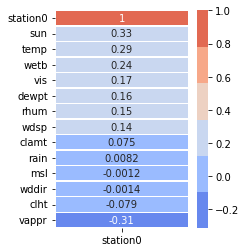

In [16]:
data_1 = (data.iloc[:, [0, 9,10,11,12, 13, 14, 15, 16, 17, 18, 19, 20, 21]].corr()[['station0']]).sort_values('station0', ascending=False)
colormap = sns.color_palette("coolwarm")
fig, ax = plt.subplots(figsize=(3,4)) 
ax = sns.heatmap(data_1, cmap=colormap, annot = True, linewidths=.5,)

In [18]:
weather = weather_data.groupby(by='Date').mean().reset_index()
weather['Date'] = pd.to_datetime(weather.Date, format='%d/%m/%Y')
weather['Year'] = weather['Date'].dt.year
weather['Month'] = weather['Date'].dt.month
weather = weather.sort_values(by = ['Year','Month']).reset_index(drop=True)
weather = weather.drop(['Year','Month'],axis=1).reset_index(drop=True)
weather = weather.set_index('Date')
weather

,rain,temp,wetb,dewpt,rhum,vappr,msl,wdsp,wddir,sun,vis,clht,clamt
Date,,,,,,,,,,,,,
2013-03-01,0.000000,4.695833,3.808333,2.533333,7.404167,86.666667,1033.154167,6.041667,80.833333,0.141667,18958.333333,206.458333,5.500000
2013-03-02,0.000000,1.908333,1.150000,0.004167,6.179167,88.125000,1029.387500,4.250000,276.250000,0.025000,31250.000000,352.916667,5.333333
2013-03-03,0.000000,4.745833,3.445833,1.445833,6.770833,79.958333,1022.304167,5.416667,183.750000,0.150000,22791.666667,310.166667,5.708333
2013-03-04,0.000000,4.262500,2.758333,0.362500,6.258333,76.125000,1011.950000,7.791667,137.500000,0.083333,15750.000000,215.708333,6.166667
2013-03-05,0.000000,3.262500,2.537500,1.508333,6.954167,89.333333,1003.958333,6.625000,70.833333,0.208333,5595.833333,581.958333,3.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,0.033333,2.837500,1.758333,-0.041667,6.083333,81.625000,1008.404167,12.291667,247.083333,0.283333,24791.666667,561.041667,4.750000
2022-02-25,0.000000,6.166667,4.579167,2.416667,7.291667,77.291667,1024.262500,9.625000,230.416667,0.250000,28125.000000,489.166667,4.041667
2022-02-26,0.000000,8.658333,6.245833,2.987500,7.591667,67.583333,1019.304167,16.625000,182.083333,0.016667,26458.333333,44.041667,6.000000


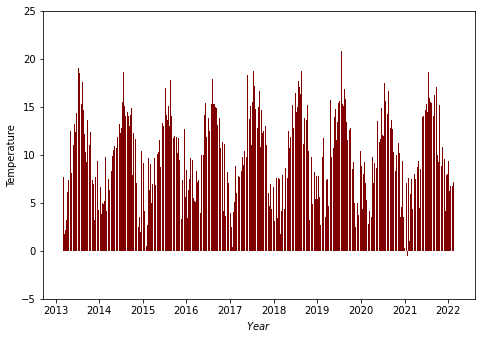

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(weather['Date'], weather['temp'], color ='maroon')
plt.gca().set(ylim=(-5, 25), ylabel="Temperature", xlabel='$Year$')
plt.show()

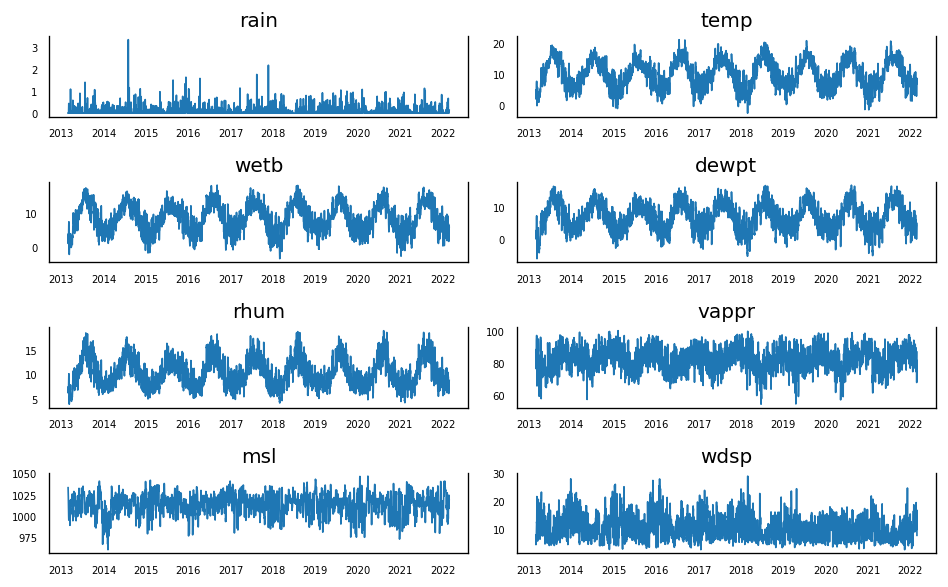

In [21]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(8,5))
for i, ax in enumerate(axes.flatten()):
    data = weather[weather.columns[i]]
    ax.plot(data,  linewidth=1)
    # Decorations
    ax.set_title(weather.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)


plt.tight_layout();